In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,city,age,python_yn,html_yn,css_yn,aws_yn,django_yn,postgresql_yn
0,Full Stack Python Business Systems Developer -...,CA$77K-CA$91K (Glassdoor est.),"Noramtec Consultants, on behalf of our Montrea...",4.1,Noramtec Consultants\n4.1,Montreal,-1,201 to 500 Employees,1964,Company - Private,...,84.0,Noramtec Consultants\n,Montreal,56,1,0,0,0,1,0
1,Senior Developer (Python/NoSQL),CA$77K-CA$91K (Glassdoor est.),What you’re looking for: Would you like to wor...,3.8,"SilkStart Technology, Inc.\n3.8",Vancouver,-1,1 to 50 Employees,-1,Company - Private,...,84.0,"SilkStart Technology, Inc.\n",Vancouver,-1,1,0,1,1,0,0
2,Big Data / Scala Developer,CA$77K-CA$91K (Glassdoor est.),We have an exciting opportunity for the right ...,-1.0,Allevar,Toronto,-1,51 to 200 Employees,-1,Company - Private,...,84.0,Allevar,Toronto,-1,0,0,0,0,0,0
3,"Systems Developer, Quantitative Equity",CA$77K-CA$91K (Glassdoor est.),"Systems Developer, Quantitative Equity\nConnor...",4.3,"Connor, Clark & Lunn Financial Group\n4.3",Vancouver,-1,201 to 500 Employees,1982,Company - Private,...,84.0,"Connor, Clark & Lunn Financial Group\n",Vancouver,38,1,0,0,0,0,0
4,"Full-Stack Developer - RACE21, Vancouver",CA$77K-CA$91K (Glassdoor est.),"Location: Vancouver, BC, CA\n\nThe Full-Stack ...",3.9,Teck Resources Limited\n3.9,British Columbia,-1,5001 to 10000 Employees,-1,Company - Public,...,84.0,Teck Resources Limited\n,British Columbia,-1,1,0,0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'city', 'age', 'python_yn', 'html_yn', 'css_yn',
       'aws_yn', 'django_yn', 'postgresql_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'python developer' in title.lower():
        return 'python developer'
    elif 'python engineer' in title.lower():
        return 'python engineer'
    elif 'software developer' in title.lower():
        return 'software developer'
    elif 'django developer' in title.lower():
        return 'django developer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		 
##  Job description length 

## hourly wage to annual 

# remove new line from job title

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

software developer    378
na                    279
python developer       31
django developer        3
Name: job_simp, dtype: int64

In [14]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        649
senior     41
jr          1
Name: seniority, dtype: int64

In [11]:
df.city.value_counts()

Montreal           130
Toronto            122
Vancouver           73
Ottawa              46
Calgary             38
                  ... 
Chilliwack           1
Greater Sudbury      1
Clarington           1
Dorval               1
Baie-d'Urfé          1
Name: city, Length: 70, dtype: int64

In [12]:
##  Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2550
1      3880
2      1283
3      2760
4      3800
       ... 
686    1800
687    3262
688    1253
689    1850
690    4155
Name: desc_len, Length: 691, dtype: int64

In [21]:
## hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

In [23]:
df[['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
0,0,77,91
1,0,77,91
2,0,77,91
3,0,77,91
4,0,77,91
...,...,...,...
686,0,52,75
687,0,52,75
688,0,52,75
689,0,52,75


In [25]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                      Noramtec Consultants
1                SilkStart Technology, Inc.
2                                   Allevar
3      Connor, Clark & Lunn Financial Group
4                    Teck Resources Limited
                       ...                 
686                                   Levio
687                                  Oracle
688                                Thinkmax
689                       Sphinix Solutions
690                   RPM TECHNOLOGIES CORP
Name: company_txt, Length: 691, dtype: object

In [27]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,html_yn,css_yn,aws_yn,django_yn,postgresql_yn,desc_len
count,691.000000,691.0,691.000000,691.0,691.0,691.0,691.000000,691.000000,691.000000,691.000000,691.000000,691.00000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,2.791751,-1.0,1171.283647,-1.0,0.0,0.0,63.324168,80.189580,71.756874,17.677279,0.473227,0.33864,0.335745,0.267728,0.073806,0.108538,3038.416787
std,2.173778,0.0,980.355368,0.0,0.0,0.0,16.887238,18.281858,17.346142,31.863318,0.499644,0.47359,0.472592,0.443096,0.261644,0.311284,1483.044632
min,-1.000000,-1.0,-1.000000,-1.0,0.0,0.0,39.000000,50.000000,45.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,282.000000
25%,2.500000,-1.0,-1.000000,-1.0,0.0,0.0,48.000000,60.000000,54.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1915.000000
50%,3.700000,-1.0,1976.000000,-1.0,0.0,0.0,66.000000,85.000000,73.500000,9.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2838.000000
75%,4.200000,-1.0,2001.500000,-1.0,0.0,0.0,79.000000,94.000000,86.500000,21.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,3932.000000
max,5.000000,-1.0,2019.000000,-1.0,0.0,0.0,91.000000,116.000000,103.500000,201.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10100.000000


In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'city', 'age', 'python_yn', 'html_yn', 'css_yn',
       'aws_yn', 'django_yn', 'postgresql_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

<AxesSubplot:>

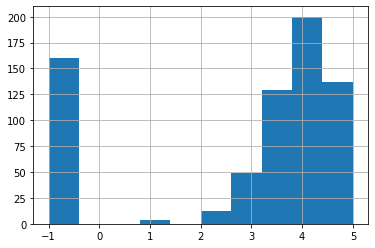

In [29]:
df.Rating.hist()

<AxesSubplot:>

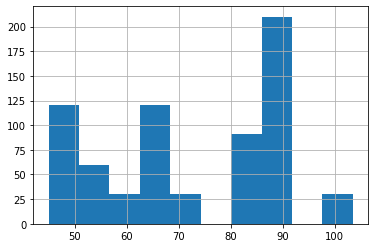

In [30]:
df.avg_salary.hist()

<AxesSubplot:>

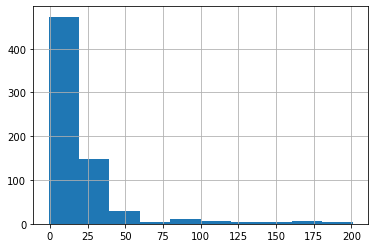

In [31]:
df.age.hist()

<AxesSubplot:>

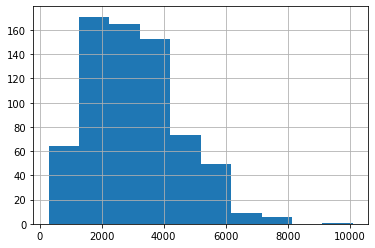

In [32]:
df.desc_len.hist()

<AxesSubplot:>

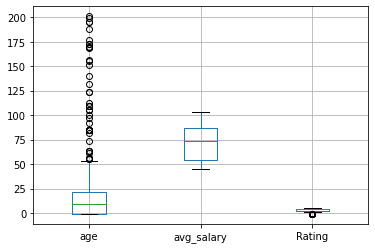

In [35]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

<AxesSubplot:>

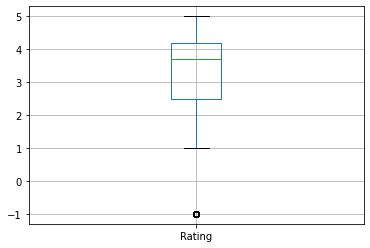

In [36]:
df.boxplot(column = ['Rating'])

In [37]:
# Corrilations between the below
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.030096,0.274794,0.181111
avg_salary,0.030096,1.000000,-0.007033,-0.056500
Rating,0.274794,-0.007033,1.000000,0.203771
desc_len,0.181111,-0.056500,0.203771,1.000000


<AxesSubplot:>

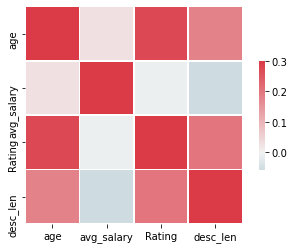

In [39]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'city', 'age', 'python_yn', 'html_yn', 'css_yn',
       'aws_yn', 'django_yn', 'postgresql_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [45]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'city', 'python_yn', 'html_yn',
       'css_yn', 'aws_yn', 'django_yn', 'job_simp', 'seniority']]

graph for Location: total = 70


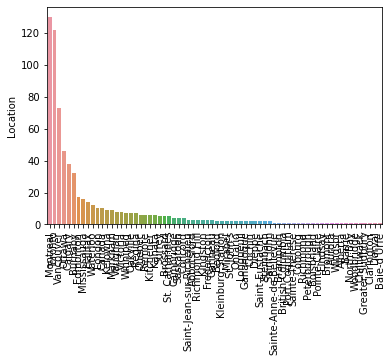

graph for Size: total = 9


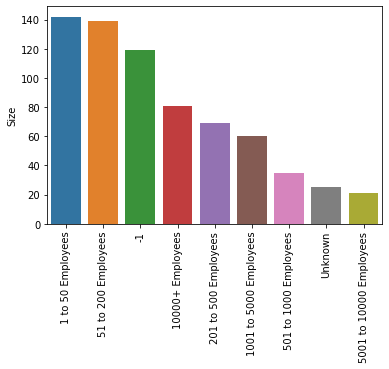

graph for Type of ownership: total = 9


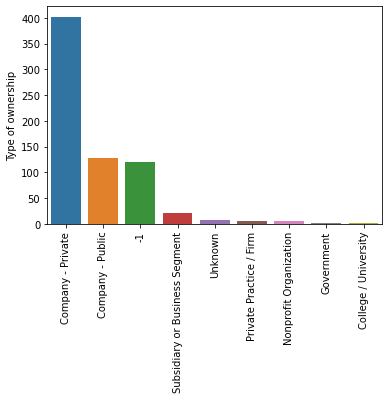

graph for Industry: total = 53


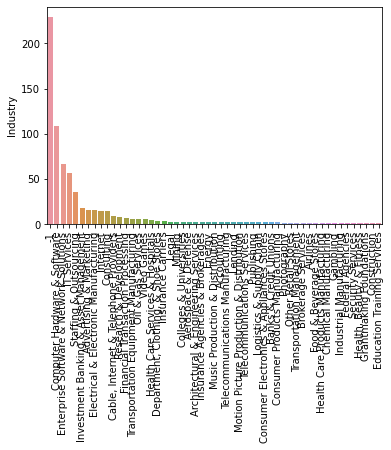

graph for Sector: total = 22


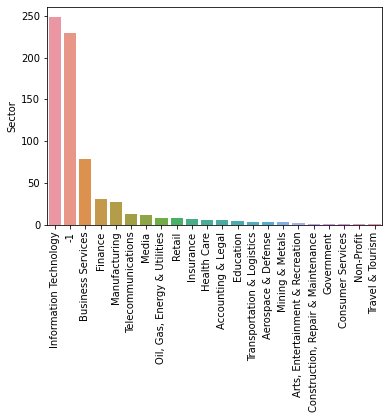

graph for Revenue: total = 14


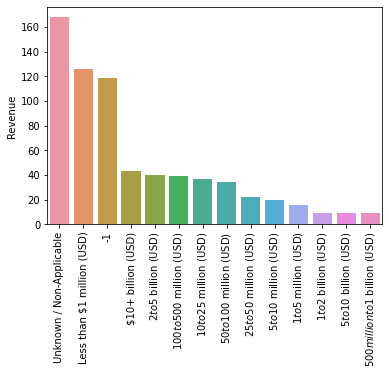

graph for city: total = 70


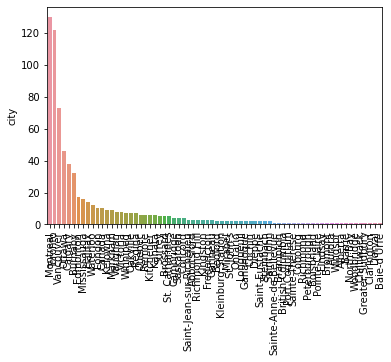

graph for python_yn: total = 2


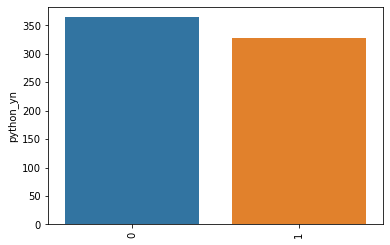

graph for html_yn: total = 2


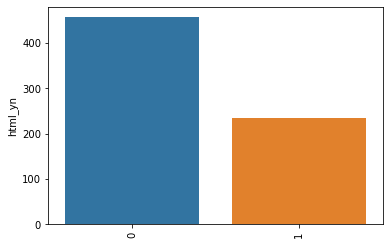

graph for css_yn: total = 2


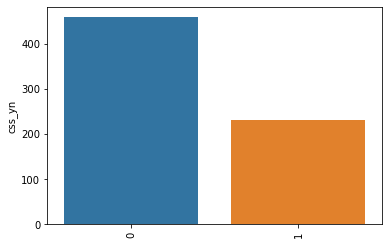

graph for aws_yn: total = 2


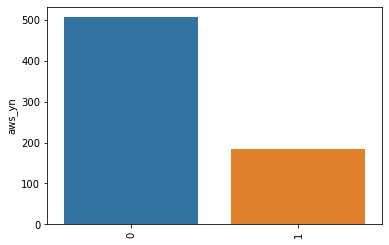

graph for django_yn: total = 2


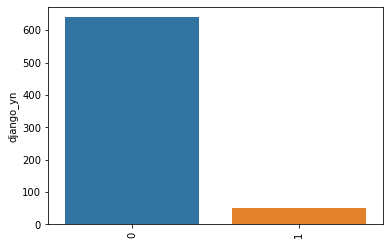

graph for job_simp: total = 4


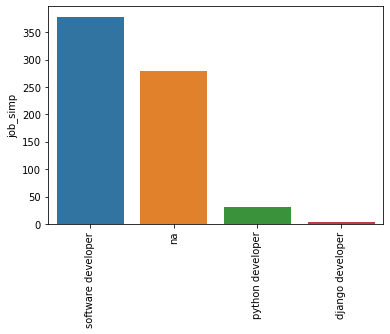

graph for seniority: total = 3


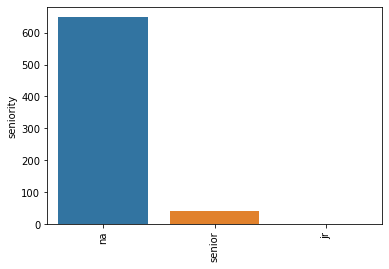

In [46]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


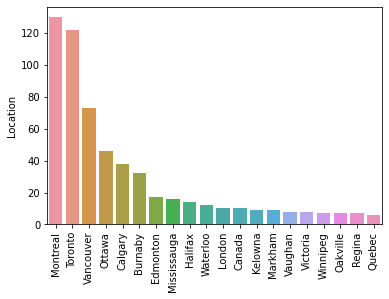

In [58]:
for i in df_cat[['Location']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [60]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'city', 'age', 'python_yn', 'html_yn', 'css_yn',
       'aws_yn', 'django_yn', 'postgresql_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [61]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
django developer,65.500000
na,69.275986
python developer,80.000000
software developer,72.961640


In [62]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp           seniority            
django developer   na          65.500000
na                 na          69.167315
                   senior      70.545455
python developer   na          81.068966
                   senior      64.500000
software developer jr          91.500000
                   na          73.009722
                   senior      70.852941

In [65]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [70]:
pd.pivot_table(df, index = ['city', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('avg_salary', ascending=False)

avg_salary
city                     job_simp                      
Montreal                 na                          75
Toronto                  na                          67
                         software developer          48
Montreal                 software developer          43
Vancouver                software developer          40
Ottawa                   software developer          35
Vancouver                na                          26
Burnaby                  software developer          21
Calgary                  software developer          20
                         na                          18
Mississauga              software developer          16
Edmonton                 software developer          16
Waterloo                 software developer          11
Burnaby                  na                          11
Montreal                 python developer             9
Ottawa                   na                           9
London                   software developer           8
Vancouver                python developer             7
Toronto                  python developer             7
Halifax                  na                           7
Vaughan                  software developer           6
Halifax                  software developer           6
Canada                   na                           5
Winnipeg                 software developer           5
St. Catharines           software developer           5
Kelowna                  na                           5
Remote                   software developer           5
Regina                   software developer           5
Quebec                   software developer           5
Brossard                 na                           5
Markham                  software developer           5
Kelowna                  software developer           4
Kanata                   software developer           4
Saskatoon                software developer           4
Victoria                 software developer           4
                         na                           4
Oakville                 software developer           4
Concord                  na                           4
Kitchener                software developer           4
Surrey                   software developer           4
Montreal                 django developer             3
Markham                  na                           3
Oakville                 na                           3
Abbotsford               software developer           3
Canada                   software developer           3
Cambridge                software developer           3
Gatineau                 software developer           3
Kitchener                na                           2
Fredericton              na                           2
Saint John               software developer           2
Richmond Hill            software developer           2
Kleinburg Station        na                           2
Steinbach                software developer           2
Cochin                   na                           2
Regina                   na                           2
Dieppe                   software developer           2
Canada                   python developer             2
Ottawa                   python developer             2
Vaughan                  na                           2
Saint-Jean-sur-Richelieu software developer           2
Longueuil                na                           2
Gananoque                software developer           2
London                   na                           2
Kingston                 software developer           2
Mirabel                  software developer           2
Kanata                   na                           2
Bedford                  software developer           2
Winnipeg                 na                           2
Boisbriand               software developer           1
Clarington               software developer           1
Chilliwack   

In [71]:
pd.pivot_table(df[df.job_simp == 'python developer'], index = 'city', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
city,
Halifax,91.500000
Saint-Eustache,91.500000
Ottawa,87.750000
Toronto,86.714286
Edmonton,86.000000
Canada,79.750000
Montreal,77.500000
Vancouver,75.214286
Markham,45.000000


In [73]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'city', 'age', 'python_yn', 'html_yn', 'css_yn',
       'aws_yn', 'django_yn', 'postgresql_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [74]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, html, css, aws, django, desc_len, Type of onwership

In [77]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'html_yn', 'css_yn', 'aws_yn', 'django_yn', 'Type of ownership','avg_salary']]

In [78]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.4     91.500000
 4.4     80.409091
 4.9     76.800000
 2.0     76.375000
 4.8     76.375000
 3.8     76.086957
 2.7     75.785714
 3.2     75.500000
 4.0     75.440000
 4.5     74.964286
 3.7     74.730769
 2.5     74.125000
 4.2     73.869048
 3.4     73.266667
 2.8     72.833333
 3.6     72.588235
-1.0     72.043750
 5.0     71.858333
 3.5     70.655172
 3.0     70.343750
 3.9     69.806818
 2.6     68.812500
 4.3     67.650000
 3.1     67.500000
 4.1     66.809524
 2.9     65.785714
 2.2     65.500000
 1.0     65.000000
 4.6     64.050000
 3.3     61.850000
 4.7     57.884615
 2.3     48.500000
Industry
                                          avg_salary
Industry                                            
Photography                               103.500000
Aerospace & Defense                        96.166667
Airlines                                   88.000000
Music Production & Distribution            87.000000
Health, Beauty, & Fi

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [79]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),2,7
$1 to $5 million (USD),7,9
$10 to $25 million (USD),27,10
$10+ billion (USD),22,21
$100 to $500 million (USD),26,13
$2 to $5 billion (USD),13,27
$25 to $50 million (USD),10,12
$5 to $10 billion (USD),5,4
$5 to $10 million (USD),17,3
